In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression

## Sklearn Dataset Make_Regression

In [224]:
X,Y=make_regression(n_samples=100,n_features=1,bias=5,noise=8)#Here noise is  gaussian noise
#in this noise means point is scatter more or variance increase or std dev change from 1 which is std bcz of noising addition

In [225]:
print(X.shape,Y.shape)
print(X[:3],Y[:3],sep='\n')

(100, 1) (100,)
[[-0.33304547]
 [ 0.37813078]
 [ 1.05861782]]
[-16.22339315  19.06209763  49.13256152]


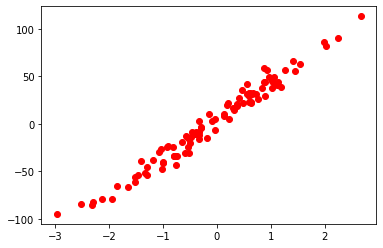

In [226]:
plt.figure()
plt.scatter(X,Y,color="red")


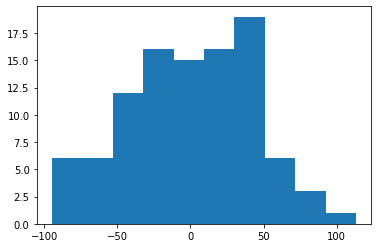

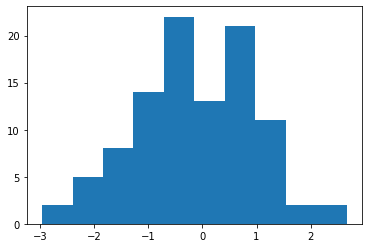

0.6782940474319588 6.57150133350774
-0.10233296300684719 1.0414539868313255


In [227]:
plt.hist(Y)
plt.show()
plt.hist(X)
plt.show()
print(Y.mean(),Y.std()**0.5)
print(X.mean(),X.std()**0.5)

## Implementation of Univariate Linear Regression

In [301]:
class Univariate_LinearRegression:
    def __init__(self,X,Y):
        self.x=X
        self.y=Y
        self.bias=np.random.random()
        self.coef=np.random.uniform(low=-1,high=1)
        self.theta=list()
        
    def Compute_Loss(self):
        loss=[]
        
        for x,y in zip(self.x,self.y):
            y_cap=self.Predict(x)
            diff=(y_cap-y)**2
            loss.append(diff)
            
        loss=np.array(loss)
        return loss.sum()/(2*self.x.shape[0])
    
    def Predict(self,x):
        return self.coef*x+self.bias
    # Gradient Calculation=->y_cap-y or (y_cap-Y)x
    def CalCulate_Gradient(self):
        grad_0=[]
        grad_1=[]
        
        for x,y in zip(self.x,self.y):
            y_cap=self.Predict(x)
            grad_0.append(y_cap-y)
            grad_1.append((y_cap-y)*x)
            
        grad_0=np.array(grad_0)
        grad_1=np.array(grad_1)
        grad_0=np.sum(grad_0)/self.x.shape[0]
        grad_1=np.sum(grad_1)/self.x.shape[0]
        return(grad_0,grad_1)
        
    def Update_Weight(self,gradient,alpha=0.4):
        self.theta.append((self.coef,self.bias))
        self.bias-=alpha*gradient[0]
        self.coef-=alpha*gradient[1]
        
    def Get_All_Pred(self):
        pred=[]
        for x,y in zip(self.x,self.y):
            pred.append(self.Predict(x))
        
        return pred
    #Static Method
    def Train(self,alpha=0.4,it=10):
        loss=[]
        for _ in range(it):
            grad=self.CalCulate_Gradient()
            self.Update_Weight(grad,alpha)
            loss.append(self.Compute_Loss())
            
        return loss
    def Gradient_batch(self,batch_size=1):
        grad_0=[]
        grad_1=[]
        idx=np.arange(self.y.shape[0])
        np.random.shuffle(idx)
        idx=idx[:batch_size]
        
        for i in idx:
            y_cap=self.Predict(self.x[i])
            grad_0.append(y_cap-self.y[i])
            grad_1.append((y_cap-self.y[i])*self.x[i])
            
        grad_0=np.array(grad_0)
        grad_1=np.array(grad_1)
        grad_0=np.sum(grad_0)/len(idx)
        grad_1=np.sum(grad_1)/len(idx)
        return grad_0 ,grad_1
    
    def Train_batch(self,alpha=0.4,epoch=10,batch_size=1):
        loss=[]
        for _ in range(epoch):
            grad=self.Gradient_batch(batch_size)
            self.Update_Weight(grad,alpha)
            loss.append(self.Compute_Loss())
            
        return loss
    def R2Score(self):
        y_bar=self.y.mean()
        #totalerror of mean =best model represent
        T_error=0
        for y in self.y:
            T_error+=((y_bar-y)**2)
            
        Pred_error=0
        for x,y in zip(self.x,self.y):
            Pred_error+=((self.Predict(x)-y)**2)
            
        return (1-Pred_error/float(T_error))

In [302]:
LR=Univariate_LinearRegression(X,Y)

In [303]:
Initial_loss=[LR.Compute_Loss()]
print(Initial_loss)

[968.7092471066532]


In [304]:
Initial_pred=LR.Get_All_Pred()
Initial_pred[:5]

[array([1.21918914]),
 array([0.66747676]),
 array([0.13957228]),
 array([1.36302149]),
 array([0.17396931])]

## Plotting Line Function

In [305]:
def Plot_best_fit(x,y,prediction):
    plt.figure()
    plt.scatter(x[:,0],Y)
    plt.plot(x[:,0],prediction,color="red")
    plt.show()

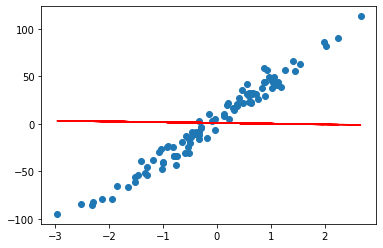

In [306]:
Plot_best_fit(X,Y,Initial_pred)

## TrainOurModelBatchGradient

In [307]:
losses_batch=LR.Train()
losses_batch[-7:]

[32.86160056779818,
 27.981876157297688,
 26.42628241984689,
 25.911398110296705,
 25.73512633168835,
 25.673042313467626,
 25.65067737269412]

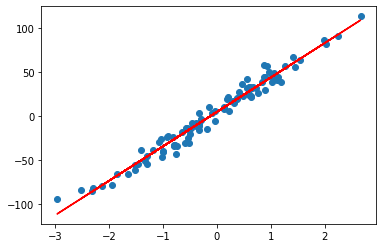

In [308]:
pred=LR.Get_All_Pred()
Plot_best_fit(X,Y,pred)

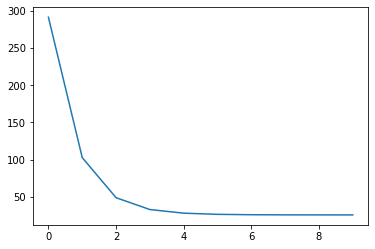

In [309]:
plt.figure()
plt.plot(losses_batch)
plt.show()

In [310]:
theta_batch=np.array(LR.theta)
theta_batch

array([[-0.77577447,  0.96082096],
       [18.0804075 ,  0.81605528],
       [27.97860479,  1.50103945],
       [33.20562606,  2.3171947 ],
       [35.98450282,  3.02084648],
       [37.47289778,  3.55678583],
       [38.27660811,  3.93927418],
       [38.71440974,  4.20166562],
       [38.95510355,  4.37702109],
       [39.08870473,  4.49208674]])

## Visulization 3d and 2d

In [292]:
T0 = np.arange(-4,20,0.01)
T1 = np.arange(-4,20,0.01)
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
m = T0.shape[0]
n = T0.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((Y - T1[i,j]*X - T0[i,j])**2)

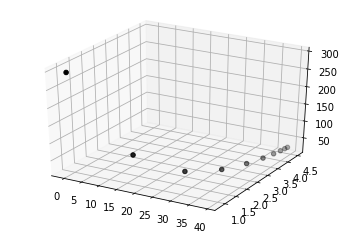

In [311]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.scatter(theta_batch[:,0],theta_batch[:,1],losses_batch,color="black")
plt.show()

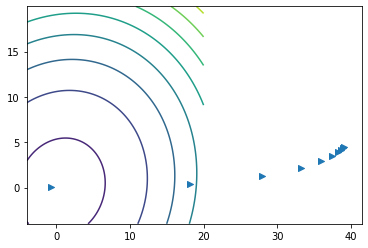

In [312]:
plt.contour(T0,T1,J)
plt.scatter(theta_batch[:,0],theata_batch[:,1],marker=">")
plt.show()

In [331]:
score=LR.R2Score()
print(score)

[0.97249128]


## StochasticBatchGradient

In [313]:
LR1=Univariate_LinearRegression(X,Y)

In [314]:
losses_SBG=LR1.Compute_Loss()
losses_SBG
# losses_SBG[-8:]

900.6123426031041

In [315]:
Losses_sbg=LR1.Train_batch(epoch=10,batch_size=1)
Losses_sbg[:3]

[220.4802170821598, 169.3275909954444, 166.92711821277632]

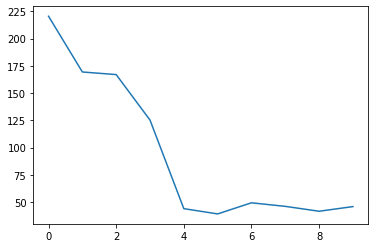

In [316]:
plt.plot(Losses_sbg)

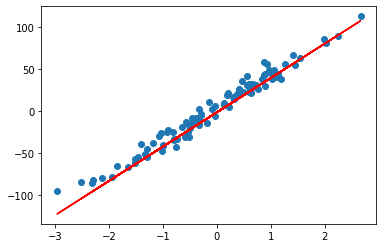

In [317]:
Plot_best_fit(X,Y,LR1.Get_All_Pred())

In [318]:
theta_sbg=np.array(LR1.theta)
theta

array([[-0.22936351,  0.13284436],
       [15.7803854 ,  4.59333009],
       [32.71477154,  4.64676803],
       [40.70706243,  7.05914668],
       [48.14480046,  8.00257504],
       [51.0742493 ,  6.57826739],
       [52.74910706,  5.83472323],
       [54.63541872,  6.6478867 ],
       [55.56682965,  6.59120535],
       [56.30925729,  6.34245655],
       [56.02319437,  6.04333536],
       [56.44781957,  6.3050127 ],
       [56.29188669,  4.90293261],
       [56.59123637,  5.05062001],
       [56.97743094,  4.71880813],
       [58.33391949,  5.4256943 ],
       [57.41166234,  5.36410236],
       [57.77127501,  5.23390483],
       [57.97978788,  5.12377419],
       [57.82872878,  4.71420906]])

## Visualization

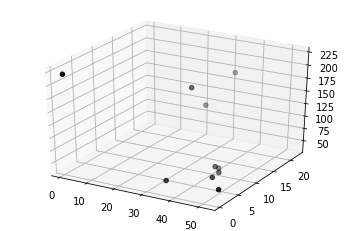

In [319]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.scatter(theta_sbg[:,0],theta_sbg[:,1],Losses_sbg,color="black")
plt.show()

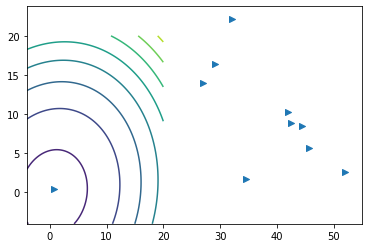

In [320]:
plt.figure()
plt.contour(T0,T1,J)
plt.scatter(theta_sbg[:,0],theta_sbg[:,1],marker=">")
plt.show()

In [330]:
score_sgb=LR1.R2Score()
print(score_sgb)

[0.95089821]


## MiniBatch Gradient

In [321]:
LR2=Univariate_LinearRegression(X,Y)

In [322]:
Loses_mini=LR2.Train_batch(batch_size=10)

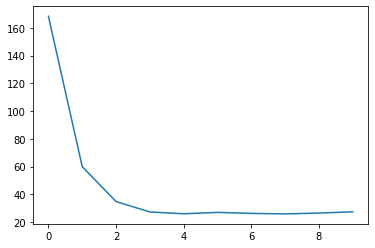

In [323]:
plt.plot(Loses_mini)

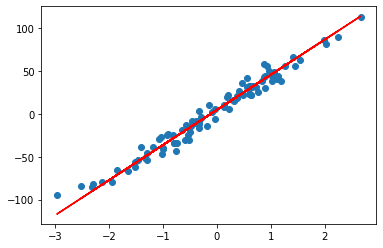

In [324]:
Plot_best_fit(X,Y,LR2.Get_All_Pred())

In [325]:
theta1=LR2.theta
theta1

[(-0.2527859777968846, 0.4662050117853834),
 (23.72266685598808, 1.9644859076033696),
 (31.628052673236017, 4.0740507899428975),
 (35.62514813115992, 2.6831522181240888),
 (38.26676431389672, 3.1363851910337015),
 (39.0710673002451, 3.858559059953145),
 (39.98069412275783, 3.331145037607973),
 (39.49795425104796, 3.6387015164678203),
 (38.95404037189043, 5.2681438098552755),
 (40.471101663016015, 4.767279528557447)]

# Visualizing Gradient Descent

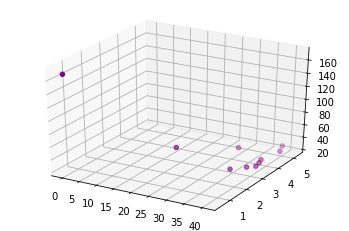

In [326]:

fig=plt.figure()
axes=fig.gca(projection='3d')
theta1=np.array(theta1)
axes.scatter(theta1[:,0],theta1[:,1],Loses_mini,color="purple")
plt.show()

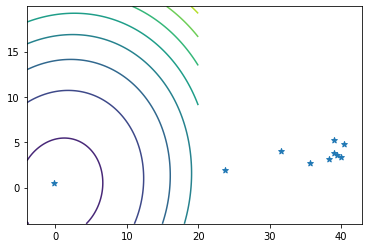

In [327]:
plt.figure()
plt.contour(T0,T1,J)
plt.scatter(theta1[:,0],theta1[:,1],marker="*")
plt.show()

In [329]:
score_mini=LR2.R2Score()
print(score_mini)

[0.97060765]


## Verifying LR Implementation Through Sklearn

In [332]:
from sklearn.linear_model import LinearRegression

In [333]:
Sk_LR=LinearRegression()

In [334]:
Sk_LR.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [343]:
pred_sk=Sk_LR.predict(X)

In [337]:
Sk_LR.score(X,Y)

0.9725052902310173

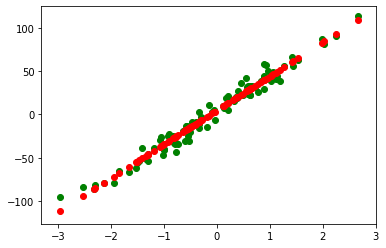

In [347]:
plt.figure()
plt.scatter(X,Y,color="green")
plt.scatter(X,pred_sk,color="red")
plt.show()